##Import Libraries.

In [11]:
#Import Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import files
uploaded = files.upload()


Saving small_business_ghana.csv to small_business_ghana (1).csv


# Data Exploration

In [13]:
# Load the CSV into a DataFrame
df = pd.read_csv('small_business_ghana.csv')

In [14]:
#Basic Information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   business_type          200 non-null    object 
 1   region                 200 non-null    object 
 2   revenue                180 non-null    float64
 3   expenses               180 non-null    float64
 4   profit_margin          200 non-null    float64
 5   years_in_operation     200 non-null    int64  
 6   owner_education        200 non-null    object 
 7   employee_count         200 non-null    int64  
 8   advertising            200 non-null    float64
 9   customer_satisfaction  200 non-null    int64  
 10  credit_access          200 non-null    object 
 11  sector_growth          200 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 18.9+ KB


In [15]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            revenue      expenses  profit_margin  years_in_operation  \
count    180.000000    180.000000     200.000000          200.000000   
mean   25464.125889  21837.688500      28.074339           12.235000   
std    13845.475401  12603.525576      12.440702            7.373031   
min     1254.060000    615.480000       5.121990            1.000000   
25%    13395.865000  11740.842500      18.163216            5.750000   
50%    25318.670000  21799.855000      28.992051           11.500000   
75%    36916.740000  31800.397500      38.510639           19.000000   
max    49110.200000  44814.500000      49.896168           24.000000   

       employee_count  advertising  customer_satisfaction  sector_growth  
count      200.000000   200.000000             200.000000     200.000000  
mean        52.130000  2508.651800               2.975000       4.931800  
std         29.722386  1437.087128               1.447359       8.990995  
min          2.000000   147.88

In [16]:
print("\nMode (most frequent values):")
print(df.mode().iloc[0])


Mode (most frequent values):
business_type                  Manufacturing
region                         Greater Accra
revenue                              1254.06
expenses                              615.48
profit_margin                        5.12199
years_in_operation                       2.0
owner_education          No Formal Education
employee_count                          98.0
advertising                           147.88
customer_satisfaction                    2.0
credit_access                             No
sector_growth                          -9.64
Name: 0, dtype: object


In [17]:
# View the first few rows
df.head()

,business_type,region,revenue,expenses,profit_margin,years_in_operation,owner_education,employee_count,advertising,customer_satisfaction,credit_access,sector_growth
0,Services,Greater Accra,42584.82,21758.31,21.441057,19,Secondary,74,503.67,5,Yes,16.34
1,Manufacturing,Volta,NaN,4188.66,26.951441,4,No Formal Education,98,3434.45,1,Yes,16.04
2,Retail,Western,35736.64,24012.47,43.286788,1,Tertiary,57,3307.10,3,Yes,14.18
3,Services,Volta,28088.18,19916.94,8.954943,8,Secondary,90,1438.97,5,No,13.70
4,Services,Western,15529.00,36193.86,41.263920,23,Secondary,41,4759.23,5,No,-0.86


##Data Visualizations (Revenue, Expenses, Business Type, Region)

In [ ]:
# Set style
sns.set(style='whitegrid')

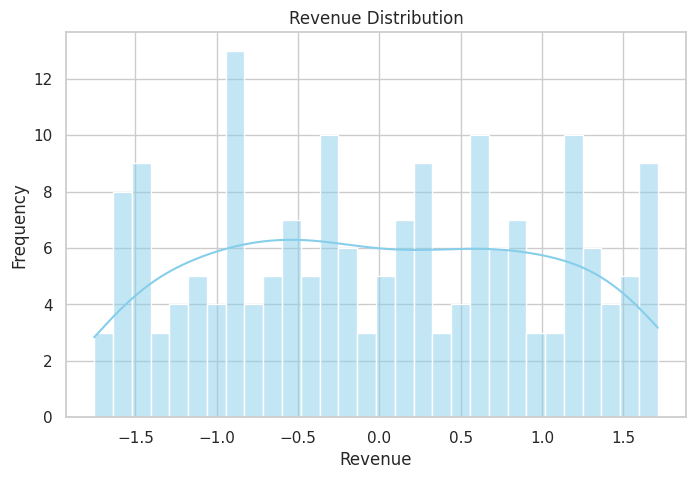

In [ ]:
# Histogram: Revenue
plt.figure(figsize=(8, 5))
sns.histplot(df['revenue'], kde=True, bins=30, color='skyblue')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

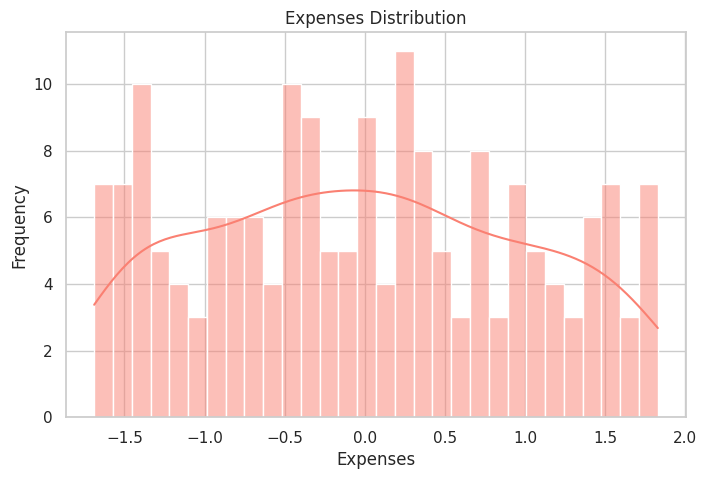

In [ ]:
# Histogram: Expenses
plt.figure(figsize=(8, 5))
sns.histplot(df['expenses'], kde=True, bins=30, color='salmon')
plt.title('Expenses Distribution')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

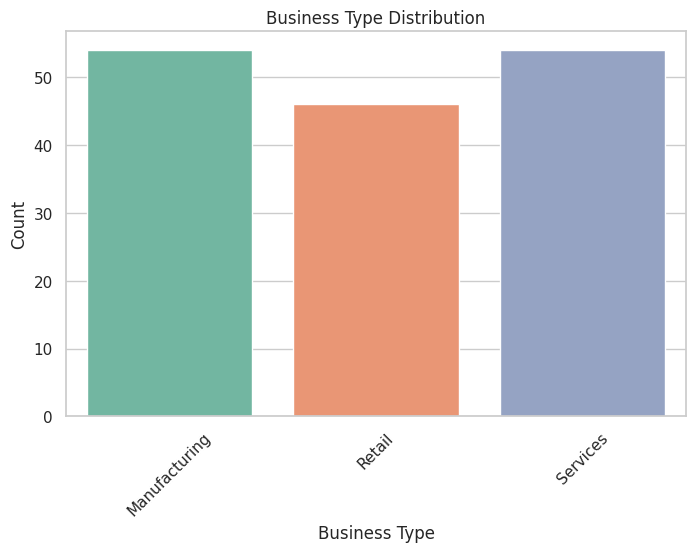

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=list(business_counts.keys()),
    y=list(business_counts.values()),
    hue=list(business_counts.keys()),
    palette='Set2',
    legend=False
)
plt.title('Business Type Distribution')
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


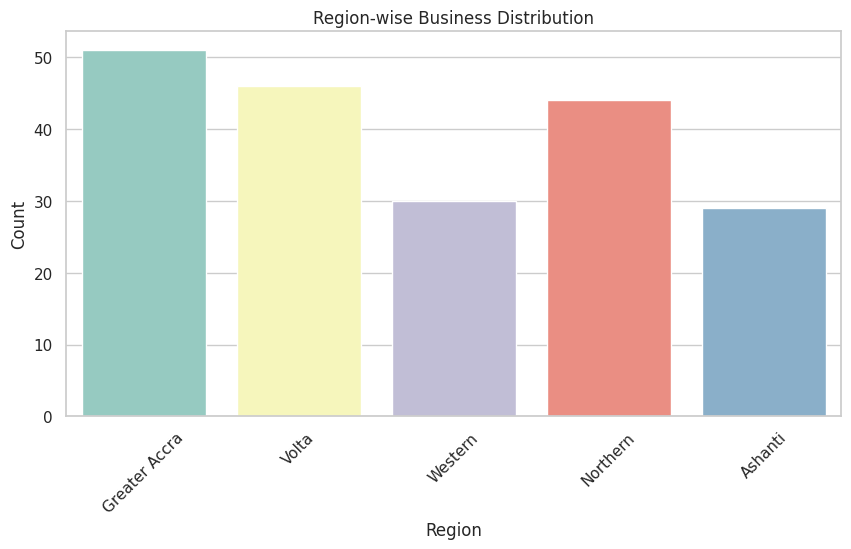

In [ ]:
# Bar Chart: Region
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='region', hue='region', palette='Set3', legend=False)
plt.title('Region-wise Business Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##Finding Missig Values

In [18]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
business_type             0
region                    0
revenue                  20
expenses                 20
profit_margin             0
years_in_operation        0
owner_education           0
employee_count            0
advertising               0
customer_satisfaction     0
credit_access             0
sector_growth             0
dtype: int64


##Handling Missing Values

In [21]:
# Median imputation for revenue and expenses
df['revenue'].fillna(df['revenue'].median(), inplace=True)
df['expenses'].fillna(df['expenses'].median(), inplace=True)

# Check if any missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
revenue                        0
expenses                       0
profit_margin                  0
years_in_operation             0
owner_education                0
employee_count                 0
advertising                    0
customer_satisfaction          0
sector_growth                  0
business_type_Manufacturing    0
business_type_Retail           0
business_type_Services         0
region_Greater Accra           0
region_Northern                0
region_Volta                   0
region_Western                 0
credit_access_Yes              0
dtype: int64


<ipython-input-21-cfef128c8069>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['revenue'].fillna(df['revenue'].median(), inplace=True)
<ipython-input-21-cfef128c8069>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

##Feature Engineering
Profit = revenue - expenses

profit_per_employee = profit/employee_count

In [ ]:
# Create 'profit' column
df['profit'] = df['revenue'] - df['expenses']

In [ ]:
# Create 'profit_per_employee' column
df['profit_per_employee'] = df['profit'] / df['employee_count']

In [ ]:
# Check the first few rows to confirm
df[['revenue', 'expenses', 'profit', 'employee_count', 'profit_per_employee']].head()

,revenue,expenses,profit,employee_count,profit_per_employee
0,42584.82,21758.31,20826.51,74,281.439324
1,NaN,4188.66,NaN,98,NaN
2,35736.64,24012.47,11724.17,57,205.687193
3,28088.18,19916.94,8171.24,90,90.791556
4,15529.00,36193.86,-20664.86,41,-504.020976


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['revenue'].plot(kind='hist', bins=20, title='revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['expenses'].plot(kind='hist', bins=20, title='expenses')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['profit'].plot(kind='hist', bins=20, title='profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='revenue', y='expenses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='expenses', y='profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='profit', y='employee_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['expenses']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('expenses')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['profit']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('profit')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['employee_count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('employee_count')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['expenses'].plot(kind='line', figsize=(8, 4), title='expenses')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['profit'].plot(kind='line', figsize=(8, 4), title='profit')
plt.gca().spines[['top', 'right']].set_visible(False)

##Why Scaling?
Some models (like KNN, SVM, logistic regression) are sensitive to feature scale. Features like revenue, advertising, and expenses have large values, while others like customer_satisfaction range from 1–5. So we scale to bring them to a similar range.

We'll use StandardScaler, which standardizes values to have:

Mean = 0

Standard deviation = 1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Select numerical columns to scale
num_cols = ['revenue', 'expenses', 'profit', 'advertising', 'sector_growth', 'profit_per_employee']


In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Scale and replace the values
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# Confirm scaling
df[num_cols].describe()

,revenue,expenses,profit,advertising,sector_growth,profit_per_employee
count,1.800000e+02,1.800000e+02,1.600000e+02,2.000000e+02,2.000000e+02,1.600000e+02
mean,-1.973730e-16,2.787893e-16,-4.440892e-17,-7.105427e-17,2.664535e-17,9.714451e-18
std,1.002789e+00,1.002789e+00,1.003140e+00,1.002509e+00,1.002509e+00,1.003140e+00
min,-1.753468e+00,-1.688528e+00,-2.260852e+00,-1.646870e+00,-1.628123e+00,-4.853304e+00
25%,-8.740707e-01,-8.033475e-01,-7.040286e-01,-9.072556e-01,-9.429458e-01,-1.882316e-01
50%,-1.053497e-02,-3.010192e-03,-2.588195e-02,-8.306162e-03,-7.448300e-03,-1.920782e-02
75%,8.294811e-01,7.926750e-01,6.521516e-01,8.217729e-01,8.968288e-01,1.387061e-01
max,1.712620e+00,1.828132e+00,2.080183e+00,1.725431e+00,1.668977e+00,8.241379e+00


# Encoding Categorical Variables
Some machine learning models can’t handle text (like "Retail" or "Tertiary"), so we need to convert categorical columns into numbers.

 Identify the Categorical Columns
From our data:

Nominal (no order):

business_type

region

credit_access

Ordinal (has a clear order):

owner_education: e.g., No Formal Education < Primary < Secondary < Tertiary

This will:

Turn owner_education into 0–3

Turn business_type, region, and credit_access into dummy variables (avoiding dummy variable trap by using drop_first=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'owner_education' (ordinal)
education_order = ['No Formal Education', 'Primary', 'Secondary', 'Tertiary']
df['owner_education'] = pd.Categorical(df['owner_education'], categories=education_order, ordered=True)
df['owner_education'] = df['owner_education'].cat.codes

# One-hot encode nominal categorical columns
df = pd.get_dummies(df, columns=['business_type', 'region', 'credit_access'], drop_first=True)

# Check updated DataFrame
df.head()


,revenue,expenses,profit_margin,years_in_operation,owner_education,employee_count,advertising,customer_satisfaction,sector_growth,business_type_Manufacturing,business_type_Retail,business_type_Services,region_Greater Accra,region_Northern,region_Volta,region_Western,credit_access_Yes
0,42584.82,21758.31,21.441057,19,2,74,503.67,5,16.34,False,False,True,True,False,False,False,True
1,NaN,4188.66,26.951441,4,0,98,3434.45,1,16.04,True,False,False,False,False,True,False,True
2,35736.64,24012.47,43.286788,1,3,57,3307.10,3,14.18,False,True,False,False,False,False,True,True
3,28088.18,19916.94,8.954943,8,2,90,1438.97,5,13.70,False,False,True,False,False,True,False,False
4,15529.00,36193.86,41.263920,23,2,41,4759.23,5,-0.86,False,False,True,False,False,False,True,False


# Visualization & Insight
We’ll cover:

Revenue vs. Profit — to check if higher revenue means higher profit.

Customer Satisfaction by Business Type — to see which sectors have happier customers.

Advertising vs. Profit Margin — to explore if more ad spending improves profitability.

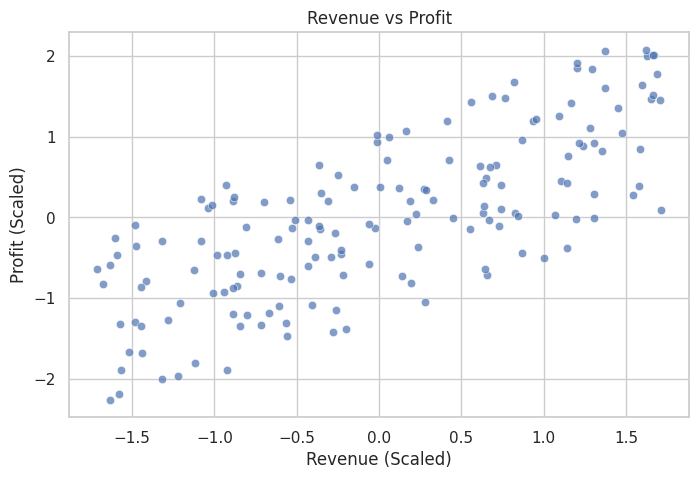

In [ ]:
# 1. Revenue vs. Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='revenue', y='profit', alpha=0.7)
plt.title('Revenue vs Profit')
plt.xlabel('Revenue (Scaled)')
plt.ylabel('Profit (Scaled)')
plt.show()

<ipython-input-20-71859a586e41>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in business_satisfaction], y=[x[1] for x in business_satisfaction], palette='viridis')


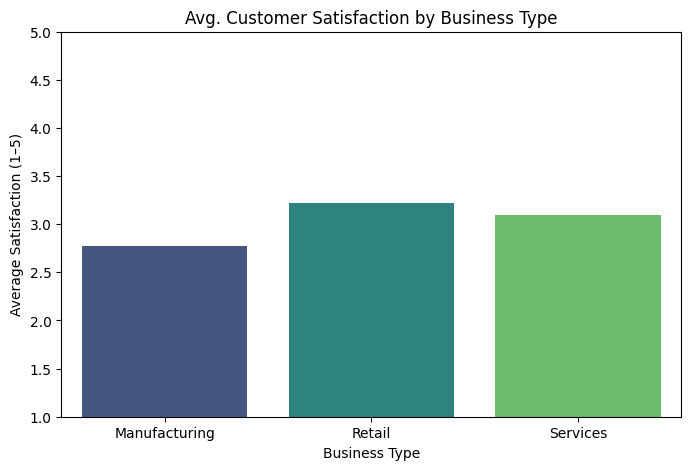

In [20]:
# 2. Customer Satisfaction by Business Type
# Extract original business type names from dummy variables
business_types = [col for col in df.columns if col.startswith('business_type_')]
business_satisfaction = []

for col in business_types:
    avg_satisfaction = df[df[col] == 1]['customer_satisfaction'].mean()
    business_satisfaction.append((col.replace('business_type_', ''), avg_satisfaction))

    # Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=[x[0] for x in business_satisfaction], y=[x[1] for x in business_satisfaction], palette='viridis')
plt.title('Avg. Customer Satisfaction by Business Type')
plt.ylabel('Average Satisfaction (1–5)')
plt.xlabel('Business Type')
plt.ylim(1, 5)
plt.show()

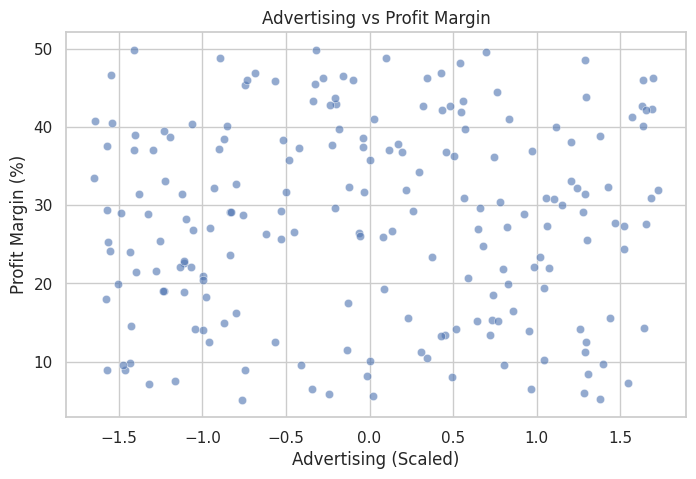

In [ ]:
# 3. Advertising vs Profit Margin
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='advertising', y='profit_margin', alpha=0.6)
plt.title('Advertising vs Profit Margin')
plt.xlabel('Advertising (Scaled)')
plt.ylabel('Profit Margin (%)')
plt.show()